In [139]:
#!pip install pandas
#!pip install seaborn
#!pip install scipy
#!pip install scikit-learn
#!pip install xgboost
#!pip install imbalanced-learn

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

In [53]:
df_merged_4=pd.read_csv("merged_final.csv")

In [54]:
df_merged_4=df_merged_4.drop(["Unnamed: 0"], axis=1)
df_merged_4

gender  anchor_age         dod   admission_location  \
0        Male          77         NaN  NON-HC FACILITY POO   
1      Female          75         NaN   TRANSFER FROM HOSP   
2      Female          25  2014-01-04   TRANSFER FROM HOSP   
3      Female          71         NaN   TRANSFER FROM HOSP   
4        Male          56         NaN  NON-HC FACILITY POO   
...       ...         ...         ...                  ...   
55904    Male          74         NaN  NON-HC FACILITY POO   
55905  Female          73         NaN  NON-HC FACILITY POO   
55906    Male          65         NaN  NON-HC FACILITY POO   
55907  Female          79         NaN  NON-HC FACILITY POO   
55908  Female          58         NaN   TRANSFER FROM HOSP   

                                     race  hospital_expire_flag  \
0              African American  or Black                     0   
1              African American  or Black                     0   
2      Unknown, Unavailable or Unreported                     1   
3                      Caucasian or White                     0   
4                      Caucasian or White                     0   
...                                   ...                   ...   
55904                  Caucasian or White                     0   
55905                  Caucasian or White                     0   
55906                  Caucasian or White                     0   
55907                  Caucasian or White                     0   
55908          African American  or Black                     0   

            insurance_cat    subject_id_hadm_id first_careunit  AG  ...  \
0                MEDICARE   10002207_1731662101    31 ICU ECLH   5  ...   
1       MEDICARE_MEDICAID   10004134_8720615736   2D-W ICU EUH  12  ...   
2                MEDICAID  10008476_59065693895     2G ICU EUH   6  ...   
3                MEDICARE  10011574_76834839655    41 CCU ECLH   8  ...   
4      MEDICARE ADVANTAGE   10011778_7698988187     5A ICU EUH   5  ...   
...                   ...                   ...            ...  ..  ...   
55904  MEDICARE ADVANTAGE   99982943_9313940080     2E ICU SJH   7  ...   
55905  MEDICARE ADVANTAGE  99983803_77055799632     2W ICU SJH   9  ...   
55906            MEDICARE  99985988_78732793759    11 ICU ECLH   8  ...   
55907            MEDICARE   99986224_4027008195       NLICU NL   7  ...   
55908            MEDICARE  99992121_65661024783     2E ICU SJH  10  ...   

      Mean Platelet Volume Osmolality, Calculated Platelet Count  \
0                     10.8                    272            307   
1                     11.0                    280            273   
2                     11.9                    313            217   
3                     11.0                    285            196   
4                      9.4                    280            192   
...                    ...                    ...            ...   
55904                 10.5                    284            250   
55905                 10.2                    266            158   
55906                 10.1                    282            127   
55907                 12.0                    267            111   
55908                  9.3                    272            991   

      Potassium Level Red Blood Cell Count Red Cell Distribution Width-CV  \
0                 4.3                 4.96                           14.1   
1                 3.8                 5.01                           13.1   
2                 3.1                 4.57                           12.9   
3                 4.7                 3.95                           17.3   
4                 4.3                 4.28                           14.7   
...               ...                  ...                            ...   
55904             3.8                 3.83                           13.9   
55905             3.2                 5.19                           13.2   
55906             3.8                 5.16    

In [55]:
df_merged_4=df_merged_4.drop_duplicates()
df_merged_4

gender  anchor_age         dod   admission_location  \
0        Male          77         NaN  NON-HC FACILITY POO   
1      Female          75         NaN   TRANSFER FROM HOSP   
2      Female          25  2014-01-04   TRANSFER FROM HOSP   
3      Female          71         NaN   TRANSFER FROM HOSP   
4        Male          56         NaN  NON-HC FACILITY POO   
...       ...         ...         ...                  ...   
55904    Male          74         NaN  NON-HC FACILITY POO   
55905  Female          73         NaN  NON-HC FACILITY POO   
55906    Male          65         NaN  NON-HC FACILITY POO   
55907  Female          79         NaN  NON-HC FACILITY POO   
55908  Female          58         NaN   TRANSFER FROM HOSP   

                                     race  hospital_expire_flag  \
0              African American  or Black                     0   
1              African American  or Black                     0   
2      Unknown, Unavailable or Unreported                     1   
3                      Caucasian or White                     0   
4                      Caucasian or White                     0   
...                                   ...                   ...   
55904                  Caucasian or White                     0   
55905                  Caucasian or White                     0   
55906                  Caucasian or White                     0   
55907                  Caucasian or White                     0   
55908          African American  or Black                     0   

            insurance_cat    subject_id_hadm_id first_careunit  AG  ...  \
0                MEDICARE   10002207_1731662101    31 ICU ECLH   5  ...   
1       MEDICARE_MEDICAID   10004134_8720615736   2D-W ICU EUH  12  ...   
2                MEDICAID  10008476_59065693895     2G ICU EUH   6  ...   
3                MEDICARE  10011574_76834839655    41 CCU ECLH   8  ...   
4      MEDICARE ADVANTAGE   10011778_7698988187     5A ICU EUH   5  ...   
...                   ...                   ...            ...  ..  ...   
55904  MEDICARE ADVANTAGE   99982943_9313940080     2E ICU SJH   7  ...   
55905  MEDICARE ADVANTAGE  99983803_77055799632     2W ICU SJH   9  ...   
55906            MEDICARE  99985988_78732793759    11 ICU ECLH   8  ...   
55907            MEDICARE   99986224_4027008195       NLICU NL   7  ...   
55908            MEDICARE  99992121_65661024783     2E ICU SJH  10  ...   

      Mean Platelet Volume Osmolality, Calculated Platelet Count  \
0                     10.8                    272            307   
1                     11.0                    280            273   
2                     11.9                    313            217   
3                     11.0                    285            196   
4                      9.4                    280            192   
...                    ...                    ...            ...   
55904                 10.5                    284            250   
55905                 10.2                    266            158   
55906                 10.1                    282            127   
55907                 12.0                    267            111   
55908                  9.3                    272            991   

      Potassium Level Red Blood Cell Count Red Cell Distribution Width-CV  \
0                 4.3                 4.96                           14.1   
1                 3.8                 5.01                           13.1   
2                 3.1                 4.57                           12.9   
3                 4.7                 3.95                           17.3   
4                 4.3                 4.28                           14.7   
...               ...                  ...                            ...   
55904             3.8                 3.83                           13.9   
55905             3.2                 5.19                           13.2   
55906             3.8                 5.16    

In [56]:
df_merged_4=df_merged_4.drop(["subject_id_hadm_id"], axis=1)
df_merged_4

gender  anchor_age         dod   admission_location  \
0        Male          77         NaN  NON-HC FACILITY POO   
1      Female          75         NaN   TRANSFER FROM HOSP   
2      Female          25  2014-01-04   TRANSFER FROM HOSP   
3      Female          71         NaN   TRANSFER FROM HOSP   
4        Male          56         NaN  NON-HC FACILITY POO   
...       ...         ...         ...                  ...   
55904    Male          74         NaN  NON-HC FACILITY POO   
55905  Female          73         NaN  NON-HC FACILITY POO   
55906    Male          65         NaN  NON-HC FACILITY POO   
55907  Female          79         NaN  NON-HC FACILITY POO   
55908  Female          58         NaN   TRANSFER FROM HOSP   

                                     race  hospital_expire_flag  \
0              African American  or Black                     0   
1              African American  or Black                     0   
2      Unknown, Unavailable or Unreported                     1   
3                      Caucasian or White                     0   
4                      Caucasian or White                     0   
...                                   ...                   ...   
55904                  Caucasian or White                     0   
55905                  Caucasian or White                     0   
55906                  Caucasian or White                     0   
55907                  Caucasian or White                     0   
55908          African American  or Black                     0   

            insurance_cat first_careunit  AG Albumin Level  ...  \
0                MEDICARE    31 ICU ECLH   5           3.9  ...   
1       MEDICARE_MEDICAID   2D-W ICU EUH  12           4.0  ...   
2                MEDICAID     2G ICU EUH   6           3.2  ...   
3                MEDICARE    41 CCU ECLH   8           2.6  ...   
4      MEDICARE ADVANTAGE     5A ICU EUH   5           4.1  ...   
...                   ...            ...  ..           ...  ...   
55904  MEDICARE ADVANTAGE     2E ICU SJH   7           3.8  ...   
55905  MEDICARE ADVANTAGE     2W ICU SJH   9           4.2  ...   
55906            MEDICARE    11 ICU ECLH   8           4.3  ...   
55907            MEDICARE       NLICU NL   7           3.0  ...   
55908            MEDICARE     2E ICU SJH  10           2.4  ...   

      Mean Platelet Volume Osmolality, Calculated Platelet Count  \
0                     10.8                    272            307   
1                     11.0                    280            273   
2                     11.9                    313            217   
3                     11.0                    285            196   
4                      9.4                    280            192   
...                    ...                    ...            ...   
55904                 10.5                    284            250   
55905                 10.2                    266            158   
55906                 10.1                    282            127   
55907                 12.0                    267            111   
55908                  9.3                    272            991   

      Potassium Level Red Blood Cell Count Red Cell Distribution Width-CV  \
0                 4.3                 4.96                           14.1   
1                 3.8                 5.01                           13.1   
2                 3.1                 4.57                           12.9   
3                 4.7                 3.95                           17.3   
4                 4.3                 4.28                           14.7   
...               ...                  ...                            ...   
55904             3.8                 3.83                           13.9   
55905             3.2                 5.19                           13.2   
55906             3.8                 5.16                           12.7   
55907             4.3                 3.57                       

In [57]:
df_merged_4.dtypes

gender                             object
anchor_age                          int64
dod                                object
admission_location                 object
race                               object
hospital_expire_flag                int64
insurance_cat                      object
first_careunit                     object
AG                                 object
Albumin Level                      object
Blood Urea Nitrogen                object
Calcium Level Total                object
Carbon Dioxide Level               object
Chloride Level                     object
Creatinine                         object
Estimated GFR                      object
Estimated GFR, African American    object
Glucose                            object
Hematocrit                         object
Hemoglobin                         object
MCH                                object
MCHC                               object
MCV                                object
Mean Platelet Volume              

### Dropping Date of Death because it directly correlates to the death
Also deleting few other non-relevant columns
Interpretation column is not clinically relevant

In [58]:
df_merged_4=df_merged_4.drop(["dod"], axis=1)

In [59]:
df_merged_4

gender  anchor_age   admission_location  \
0        Male          77  NON-HC FACILITY POO   
1      Female          75   TRANSFER FROM HOSP   
2      Female          25   TRANSFER FROM HOSP   
3      Female          71   TRANSFER FROM HOSP   
4        Male          56  NON-HC FACILITY POO   
...       ...         ...                  ...   
55904    Male          74  NON-HC FACILITY POO   
55905  Female          73  NON-HC FACILITY POO   
55906    Male          65  NON-HC FACILITY POO   
55907  Female          79  NON-HC FACILITY POO   
55908  Female          58   TRANSFER FROM HOSP   

                                     race  hospital_expire_flag  \
0              African American  or Black                     0   
1              African American  or Black                     0   
2      Unknown, Unavailable or Unreported                     1   
3                      Caucasian or White                     0   
4                      Caucasian or White                     0   
...                                   ...                   ...   
55904                  Caucasian or White                     0   
55905                  Caucasian or White                     0   
55906                  Caucasian or White                     0   
55907                  Caucasian or White                     0   
55908          African American  or Black                     0   

            insurance_cat first_careunit  AG Albumin Level  \
0                MEDICARE    31 ICU ECLH   5           3.9   
1       MEDICARE_MEDICAID   2D-W ICU EUH  12           4.0   
2                MEDICAID     2G ICU EUH   6           3.2   
3                MEDICARE    41 CCU ECLH   8           2.6   
4      MEDICARE ADVANTAGE     5A ICU EUH   5           4.1   
...                   ...            ...  ..           ...   
55904  MEDICARE ADVANTAGE     2E ICU SJH   7           3.8   
55905  MEDICARE ADVANTAGE     2W ICU SJH   9           4.2   
55906            MEDICARE    11 ICU ECLH   8           4.3   
55907            MEDICARE       NLICU NL   7           3.0   
55908            MEDICARE     2E ICU SJH  10           2.4   

      Blood Urea Nitrogen  ... Mean Platelet Volume Osmolality, Calculated  \
0                       9  ...                 10.8                    272   
1                      15  ...                 11.0                    280   
2                      14  ...                 11.9                    313   
3                      34  ...                 11.0                    285   
4                      18  ...                  9.4                    280   
...                   ...  ...                  ...                    ...   
55904                  13  ...                 10.5                    284   
55905                  16  ...                 10.2                    266   
55906                  16  ...                 10.1                    282   
55907                  28  ...                 12.0                    267   
55908                  11  ...                  9.3                    272   

      Platelet Count Potassium Level Red Blood Cell Count  \
0                307             4.3                 4.96   
1                273             3.8                 5.01   
2                217             3.1                 4.57   
3                196             4.7                 3.95   
4                192             4.3                 4.28   
...              ...             ...                  ...   
55904            250             3.8                 3.83   
55905            158             3.2                 5.19   
55906            127             3.8                 5.16   
55907            111             4.3                 3.57   
55908            991             4.3                 3.36   

      Red Cell Distribution Width-CV Red Cell Distribution Width-SD  \
0                               14.1                           45.8   
1                               13.1        

In [60]:
df_merged_4.dtypes

gender                             object
anchor_age                          int64
admission_location                 object
race                               object
hospital_expire_flag                int64
insurance_cat                      object
first_careunit                     object
AG                                 object
Albumin Level                      object
Blood Urea Nitrogen                object
Calcium Level Total                object
Carbon Dioxide Level               object
Chloride Level                     object
Creatinine                         object
Estimated GFR                      object
Estimated GFR, African American    object
Glucose                            object
Hematocrit                         object
Hemoglobin                         object
MCH                                object
MCHC                               object
MCV                                object
Mean Platelet Volume               object
Osmolality, Calculated            

In [61]:
df_merged_4['hospital_expire_flag'] = df_merged_4['hospital_expire_flag'].astype('object')

In [86]:
df_merged_4.replace('UNABLE TO CALC', np.nan, inplace=True)
df_merged_4.replace('Not Applicable', np.nan, inplace=True)
df_merged_4.replace('See Comments', np.nan, inplace=True)
df_merged_4.replace('See comments', np.nan, inplace=True)
df_merged_4.replace('see comments', np.nan, inplace=True)
df_merged_4.replace('FOOTNOTE', np.nan, inplace=True)
df_merged_4.replace('--', np.nan, inplace=True)
df_merged_4.replace('****', np.nan, inplace=True)
df_merged_4.replace('***', np.nan, inplace=True)
df_merged_4.replace('NOT APPLICABLE', np.nan, inplace=True)
df_merged_4.replace('CLOTTED', np.nan, inplace=True)
df_merged_4.replace('Unreportable', np.nan, inplace=True)
df_merged_4.replace('clotted', np.nan, inplace=True)
df_merged_4.replace('>304', 305, inplace=True)
df_merged_4.replace('>350', 360, inplace=True)



#see comments

df_merged_4.replace('see note', np.nan, inplace=True)
df_merged_4.replace('<1.0', 0.9, inplace=True)
df_merged_4.replace('<1.5', 1.4, inplace=True)
df_merged_4.replace('>52', 53, inplace=True)
df_merged_4.replace('<21', 20, inplace=True)

df_merged_4.replace('<2', 1.9, inplace=True)


df_merged_4.replace('>125', 126, inplace=True)
df_merged_4.replace('>18.0', 18.5, inplace=True)
df_merged_4.replace('>20.0', 21.0, inplace=True)
df_merged_4.replace('>45', 46, inplace=True)
df_merged_4.replace('>35', 36, inplace=True)
df_merged_4.replace('<6', 5, inplace=True)
df_merged_4.replace('<5', 4, inplace=True)
df_merged_4.replace('>150', 160, inplace=True)
df_merged_4.replace('<0.30', 0.25, inplace=True)
df_merged_4.replace('<0.20', 0.15, inplace=True)
df_merged_4.replace('>70', 75, inplace=True)
df_merged_4.replace('<10', 9, inplace=True)
df_merged_4.replace('>10.0', 11.0, inplace=True)
df_merged_4.replace('>15.0', 16.0, inplace=True)

df_merged_4.replace('#NM', np.nan, inplace=True)
df_merged_4.replace('*', np.nan, inplace=True)
df_merged_4.replace('Footnote', np.nan, inplace=True)



df_merged_4.replace('>40.7', 41.0, inplace=True)
df_merged_4.replace('>14.0', 15.0, inplace=True)
df_merged_4.replace('<0.1', 0.05, inplace=True)
df_merged_4.replace('<0.03', 0.01, inplace=True)
df_merged_4.replace('<1', 0.9, inplace=True)
df_merged_4.replace('>36', 37, inplace=True)
df_merged_4.replace('>32', 33, inplace=True)
df_merged_4.replace('>25', 26, inplace=True)
df_merged_4.replace('>28', 29, inplace=True)
df_merged_4.replace('>38', 39, inplace=True)
df_merged_4.replace('>26', 27, inplace=True)
df_merged_4.replace('>4', 5, inplace=True)
df_merged_4.replace('>6.0', 7, inplace=True)

df_merged_4.replace('<4.0', 3, inplace=True)
df_merged_4.replace('<2.0', 1.5, inplace=True)
df_merged_4.replace('>50', 51, inplace=True)

df_merged_4.replace('<', '', inplace=True)
df_merged_4.replace('>', '', inplace=True)

df_merged_4.replace('>25.00', 26.00, inplace=True)
df_merged_4.replace('>1200', 1250, inplace=True)

df_merged_4.replace('---', np.nan, inplace=True)
df_merged_4.replace('.', np.nan, inplace=True)
df_merged_4.replace('duplicate', np.nan, inplace=True)
df_merged_4.replace('qns', np.nan, inplace=True)

df_merged_4.replace('see comment', np.nan, inplace=True)
df_merged_4.replace('See comment', np.nan, inplace=True)
df_merged_4.replace('See Comment', np.nan, inplace=True)
df_merged_4.replace('SEE COMMENT', np.nan, inplace=True)
df_merged_4.replace('#v', np.nan, inplace=True)
df_merged_4.replace('MANY PLATETET CLUMPS PRESENT UNABLE TO REPORT PLATELET COUNT', np.nan, inplace=True)
df_merged_4.replace('na', np.nan, inplace=True)
df_merged_4.replace('Clotted', np.nan, inplace=True)



df_merged_4 = df_merged_4.applymap(lambda x: x.replace('<', '') if isinstance(x, str) else x)
df_merged_4 = df_merged_4.applymap(lambda x: x.replace('>', '') if isinstance(x, str) else x)

/tmp/ipykernel_257697/407946465.py:91: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_merged_4 = df_merged_4.applymap(lambda x: x.replace('<', '') if isinstance(x, str) else x)
/tmp/ipykernel_257697/407946465.py:92: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_merged_4 = df_merged_4.applymap(lambda x: x.replace('>', '') if isinstance(x, str) else x)


In [87]:
# Define the new data types for multiple columns
new_dtypes = {
"AG": "float64",
"Albumin Level"                         :'float64', 
"Blood Urea Nitrogen"                    :'float64', 
"Calcium Level Total" :'float64', 
"Carbon Dioxide Level"                   :'float64', 
"Chloride Level"                        :'float64', 
"Creatinine"                             :'float64', 
'Estimated GFR'                          :'float64', 
"Estimated GFR, African American"        :'float64', 
"Glucose"                                :'float64', 
"Hematocrit"                             :'float64', 
"Hemoglobin"                             :'float64', 
"MCH"                                    :'float64', 
"MCHC"                                   :'float64', 
"MCV"                                    :'float64', 
'Mean Platelet Volume'                   :'float64', 
"Osmolality, Calculated"              :'float64',    
'Platelet Count'                      :'float64', 
"Potassium Level"                     :'float64', 
'Red Blood Cell Count'                :'float64', 
'Red Cell Distribution Width-CV'      :'float64', 
'Red Cell Distribution Width-SD':'float64',       
'Sodium Level'     :'float64',                    
'U:C'              :'float64',                   
'White Blood Count':'float64'
}

# Apply the new data types
df_merged_4 = df_merged_4.astype(new_dtypes)





In [88]:
# Identify categorical and numerical columns
categorical_cols = df_merged_4.select_dtypes(include=['object']).columns
numerical_cols = df_merged_4.select_dtypes(include=[np.number]).columns

In [89]:
categorical_cols=list(categorical_cols)

In [90]:
categorical_cols

['gender', 'admission_location', 'race', 'insurance_cat', 'first_careunit']

In [91]:
numerical_cols=list(numerical_cols)

In [92]:
numerical_cols

['anchor_age',
 'hospital_expire_flag',
 'AG',
 'Albumin Level',
 'Blood Urea Nitrogen',
 'Calcium Level Total',
 'Carbon Dioxide Level',
 'Chloride Level',
 'Creatinine',
 'Estimated GFR',
 'Estimated GFR, African American',
 'Glucose',
 'Hematocrit',
 'Hemoglobin',
 'MCH',
 'MCHC',
 'MCV',
 'Mean Platelet Volume',
 'Osmolality, Calculated',
 'Platelet Count',
 'Potassium Level',
 'Red Blood Cell Count',
 'Red Cell Distribution Width-CV',
 'Red Cell Distribution Width-SD',
 'Sodium Level',
 'U:C',
 'White Blood Count']

## Encoding

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Dictionary to store the mappings for each column
label_mappings = {}

# Apply LabelEncoder to each categorical column and store the mappings
for column in categorical_cols:
    # Fit the label encoder to the column
    df_merged_4[column] = le.fit_transform(df_merged_4[column])
    
    # Store the mapping: original values and corresponding encoded labels
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the label mappings
for column, mapping in label_mappings.items():
    print(f"Mapping for column '{column}':")
    for original_value, encoded_value in mapping.items():
        print(f"  {original_value}: {encoded_value}")
    print()


Mapping for column 'gender':
  Female: 0
  Male: 1

Mapping for column 'admission_location':
  COURT/LAW ENFORCEMNT: 0
  INFO NOT AVAILABLE: 1
  NON-HC FACILITY POO: 2
  Not Recorded: 3
  PHYSIC OFC/CLINIC: 4
  TFR FRM AMB SURG CTR: 5
  TFR FRM HOSPICE: 6
  TFR FROM OTHER HCF: 7
  TFR FROM SAME FACIL: 8
  TRANSFER FROM HOSP: 9
  TRANSFER FROM SNF: 10

Mapping for column 'race':
  African American  or Black: 0
  Asian: 1
  Caucasian or White: 2
  Multiple: 3
  Others: 4
  Unknown, Unavailable or Unreported: 5

Mapping for column 'insurance_cat':
  GOV: 0
  MEDICAID: 1
  MEDICAID ADVANTAGE: 2
  MEDICARE: 3
  MEDICARE : 4
  MEDICARE ADVANTAGE: 5
  MEDICARE_MEDICAID: 6
  PRIVATE: 7
  SELF PAY: 8
  WORKERS COMP: 9
  nan: 10

Mapping for column 'first_careunit':
  11 ICU ECLH: 0
  1F ICU EJCH: 1
  21 ICU ECLH: 2
  2D-E ICU EUH: 3
  2D-W ICU EUH: 4
  2E ICU SJH: 5
  2G ICU EUH: 6
  2G-N CCU EUH: 7
  2G-S ICU EUH: 8
  2S SJH: 9
  2SW ICU SJH: 10
  2W ICU SJH: 11
  31 ICU ECLH: 12
  3D EUH: 13


In [95]:
df_merged_4

gender  anchor_age  admission_location  race  hospital_expire_flag  \
0           1          77                   2     0                     0   
1           0          75                   9     0                     0   
2           0          25                   9     5                     1   
3           0          71                   9     2                     0   
4           1          56                   2     2                     0   
...       ...         ...                 ...   ...                   ...   
55904       1          74                   2     2                     0   
55905       0          73                   2     2                     0   
55906       1          65                   2     2                     0   
55907       0          79                   2     2                     0   
55908       0          58                   9     0                     0   

       insurance_cat  first_careunit    AG  Albumin Level  \
0                  3              12   5.0            3.9   
1                  6               4  12.0            4.0   
2                  1               6   6.0            3.2   
3                  3              16   8.0            2.6   
4                  5              19   5.0            4.1   
...              ...             ...   ...            ...   
55904              5               5   7.0            3.8   
55905              5              11   9.0            4.2   
55906              3               0   8.0            4.3   
55907              3              30   7.0            3.0   
55908              3               5  10.0            2.4   

       Blood Urea Nitrogen  ...  Mean Platelet Volume  Osmolality, Calculated  \
0                      9.0  ...                  10.8                   272.0   
1                     15.0  ...                  11.0                   280.0   
2                     14.0  ...                  11.9                   313.0   
3                     34.0  ...                  11.0                   285.0   
4                     18.0  ...                   9.4                   280.0   
...                    ...  ...                   ...                     ...   
55904                 13.0  ...                  10.5                   284.0   
55905                 16.0  ...                  10.2                   266.0   
55906                 16.0  ...                  10.1                   282.0   
55907                 28.0  ...                  12.0                   267.0   
55908                 11.0  ...                   9.3                   272.0   

       Platelet Count  Potassium Level  Red Blood Cell Count  \
0               307.0              4.3                  4.96   
1               273.0              3.8                  5.01   
2               217.0              3.1                  4.57   
3               196.0              4.7                  3.95   
4               192.0              4.3                  4.28   
...               ...              ...                   ...   
55904           250.0              3.8                  3.83   
55905           158.0              3.2                  5.19   
55906           127.0              3.8                  5.16   
55907           111.0              4.3                  3.57   
55908           991.0              4.3                  3.36   

       Red Cell Distribution Width-CV  Red Cell Distribution Width-SD  \
0                                14.1                            45.8   
1                                13.1                            45.8   
2                                12.9                            46.8   
3                                17.3                            58.8   
4                                14.7                            46.1   
...                               ...                             ...   
55904                            13.9                            49.5   
55905                  

In [96]:
df_merged_4.dtypes

gender                               int64
anchor_age                           int64
admission_location                   int64
race                                 int64
hospital_expire_flag                 int64
insurance_cat                        int64
first_careunit                       int64
AG                                 float64
Albumin Level                      float64
Blood Urea Nitrogen                float64
Calcium Level Total                float64
Carbon Dioxide Level               float64
Chloride Level                     float64
Creatinine                         float64
Estimated GFR                      float64
Estimated GFR, African American    float64
Glucose                            float64
Hematocrit                         float64
Hemoglobin                         float64
MCH                                float64
MCHC                               float64
MCV                                float64
Mean Platelet Volume               float64
Osmolality,

In [101]:
df_merged_4 = df_merged_4.astype({"gender":'object',
                "admission_location":"object",
                "race":"object",
                "hospital_expire_flag":"object",
                "insurance_cat":"object",
                "first_careunit":"object",
                #"last_careunit":"object",
                #"spec_type_desc":"object",
                #"test_name":"object",
                #"org_name":"object",
                #"ab_name":"object"
               })

df_merged_4.dtypes

gender                              object
anchor_age                           int64
admission_location                  object
race                                object
hospital_expire_flag                object
insurance_cat                       object
first_careunit                      object
AG                                 float64
Albumin Level                      float64
Blood Urea Nitrogen                float64
Calcium Level Total                float64
Carbon Dioxide Level               float64
Chloride Level                     float64
Creatinine                         float64
Estimated GFR                      float64
Estimated GFR, African American    float64
Glucose                            float64
Hematocrit                         float64
Hemoglobin                         float64
MCH                                float64
MCHC                               float64
MCV                                float64
Mean Platelet Volume               float64
Osmolality,

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
df=df_merged_4

In [104]:
df

gender  anchor_age admission_location race hospital_expire_flag  \
0          1          77                  2    0                    0   
1          0          75                  9    0                    0   
2          0          25                  9    5                    1   
3          0          71                  9    2                    0   
4          1          56                  2    2                    0   
...      ...         ...                ...  ...                  ...   
55904      1          74                  2    2                    0   
55905      0          73                  2    2                    0   
55906      1          65                  2    2                    0   
55907      0          79                  2    2                    0   
55908      0          58                  9    0                    0   

      insurance_cat first_careunit    AG  Albumin Level  Blood Urea Nitrogen  \
0                 3             12   5.0            3.9                  9.0   
1                 6              4  12.0            4.0                 15.0   
2                 1              6   6.0            3.2                 14.0   
3                 3             16   8.0            2.6                 34.0   
4                 5             19   5.0            4.1                 18.0   
...             ...            ...   ...            ...                  ...   
55904             5              5   7.0            3.8                 13.0   
55905             5             11   9.0            4.2                 16.0   
55906             3              0   8.0            4.3                 16.0   
55907             3             30   7.0            3.0                 28.0   
55908             3              5  10.0            2.4                 11.0   

       ...  Mean Platelet Volume  Osmolality, Calculated  Platelet Count  \
0      ...                  10.8                   272.0           307.0   
1      ...                  11.0                   280.0           273.0   
2      ...                  11.9                   313.0           217.0   
3      ...                  11.0                   285.0           196.0   
4      ...                   9.4                   280.0           192.0   
...    ...                   ...                     ...             ...   
55904  ...                  10.5                   284.0           250.0   
55905  ...                  10.2                   266.0           158.0   
55906  ...                  10.1                   282.0           127.0   
55907  ...                  12.0                   267.0           111.0   
55908  ...                   9.3                   272.0           991.0   

       Potassium Level  Red Blood Cell Count  Red Cell Distribution Width-CV  \
0                  4.3                  4.96                            14.1   
1                  3.8                  5.01                            13.1   
2                  3.1                  4.57                            12.9   
3                  4.7                  3.95                            17.3   
4                  4.3                  4.28                            14.7   
...                ...                   ...                             ...   
55904              3.8                  3.83                            13.9   
55905              3.2                  5.19                            13.2   
55906              3.8                  5.16                            12.7   
55907              4.3                  3.57                            15.5   
55908              4.3                  3.36                            18.1   

       Red Cell Distribution Width-SD  Sodium Level   U:C  White Blood Count  
0                                45.8         136.0  12.0               10.0  
1                                45.8         139.0  25.0                5.5  
2                                46.8         158.0  10.0

## Finding highly correlated features

In [105]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Initialize a correlation matrix
correlation_matrix = pd.DataFrame(np.zeros((len(df.columns), len(df.columns))), 
                                  index=df.columns, columns=df.columns)

# Populate correlation matrix
for col1 in df.columns:
    for col2 in df.columns:
        if col1 in numerical_cols and col2 in numerical_cols:
            correlation_matrix.loc[col1, col2] = df[[col1, col2]].corr().iloc[0, 1]
        elif col1 in categorical_cols and col2 in categorical_cols:
            correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        else:
            # Correlation between numerical and categorical variables
            correlation_matrix.loc[col1, col2] = np.nan  # You can apply other techniques if needed


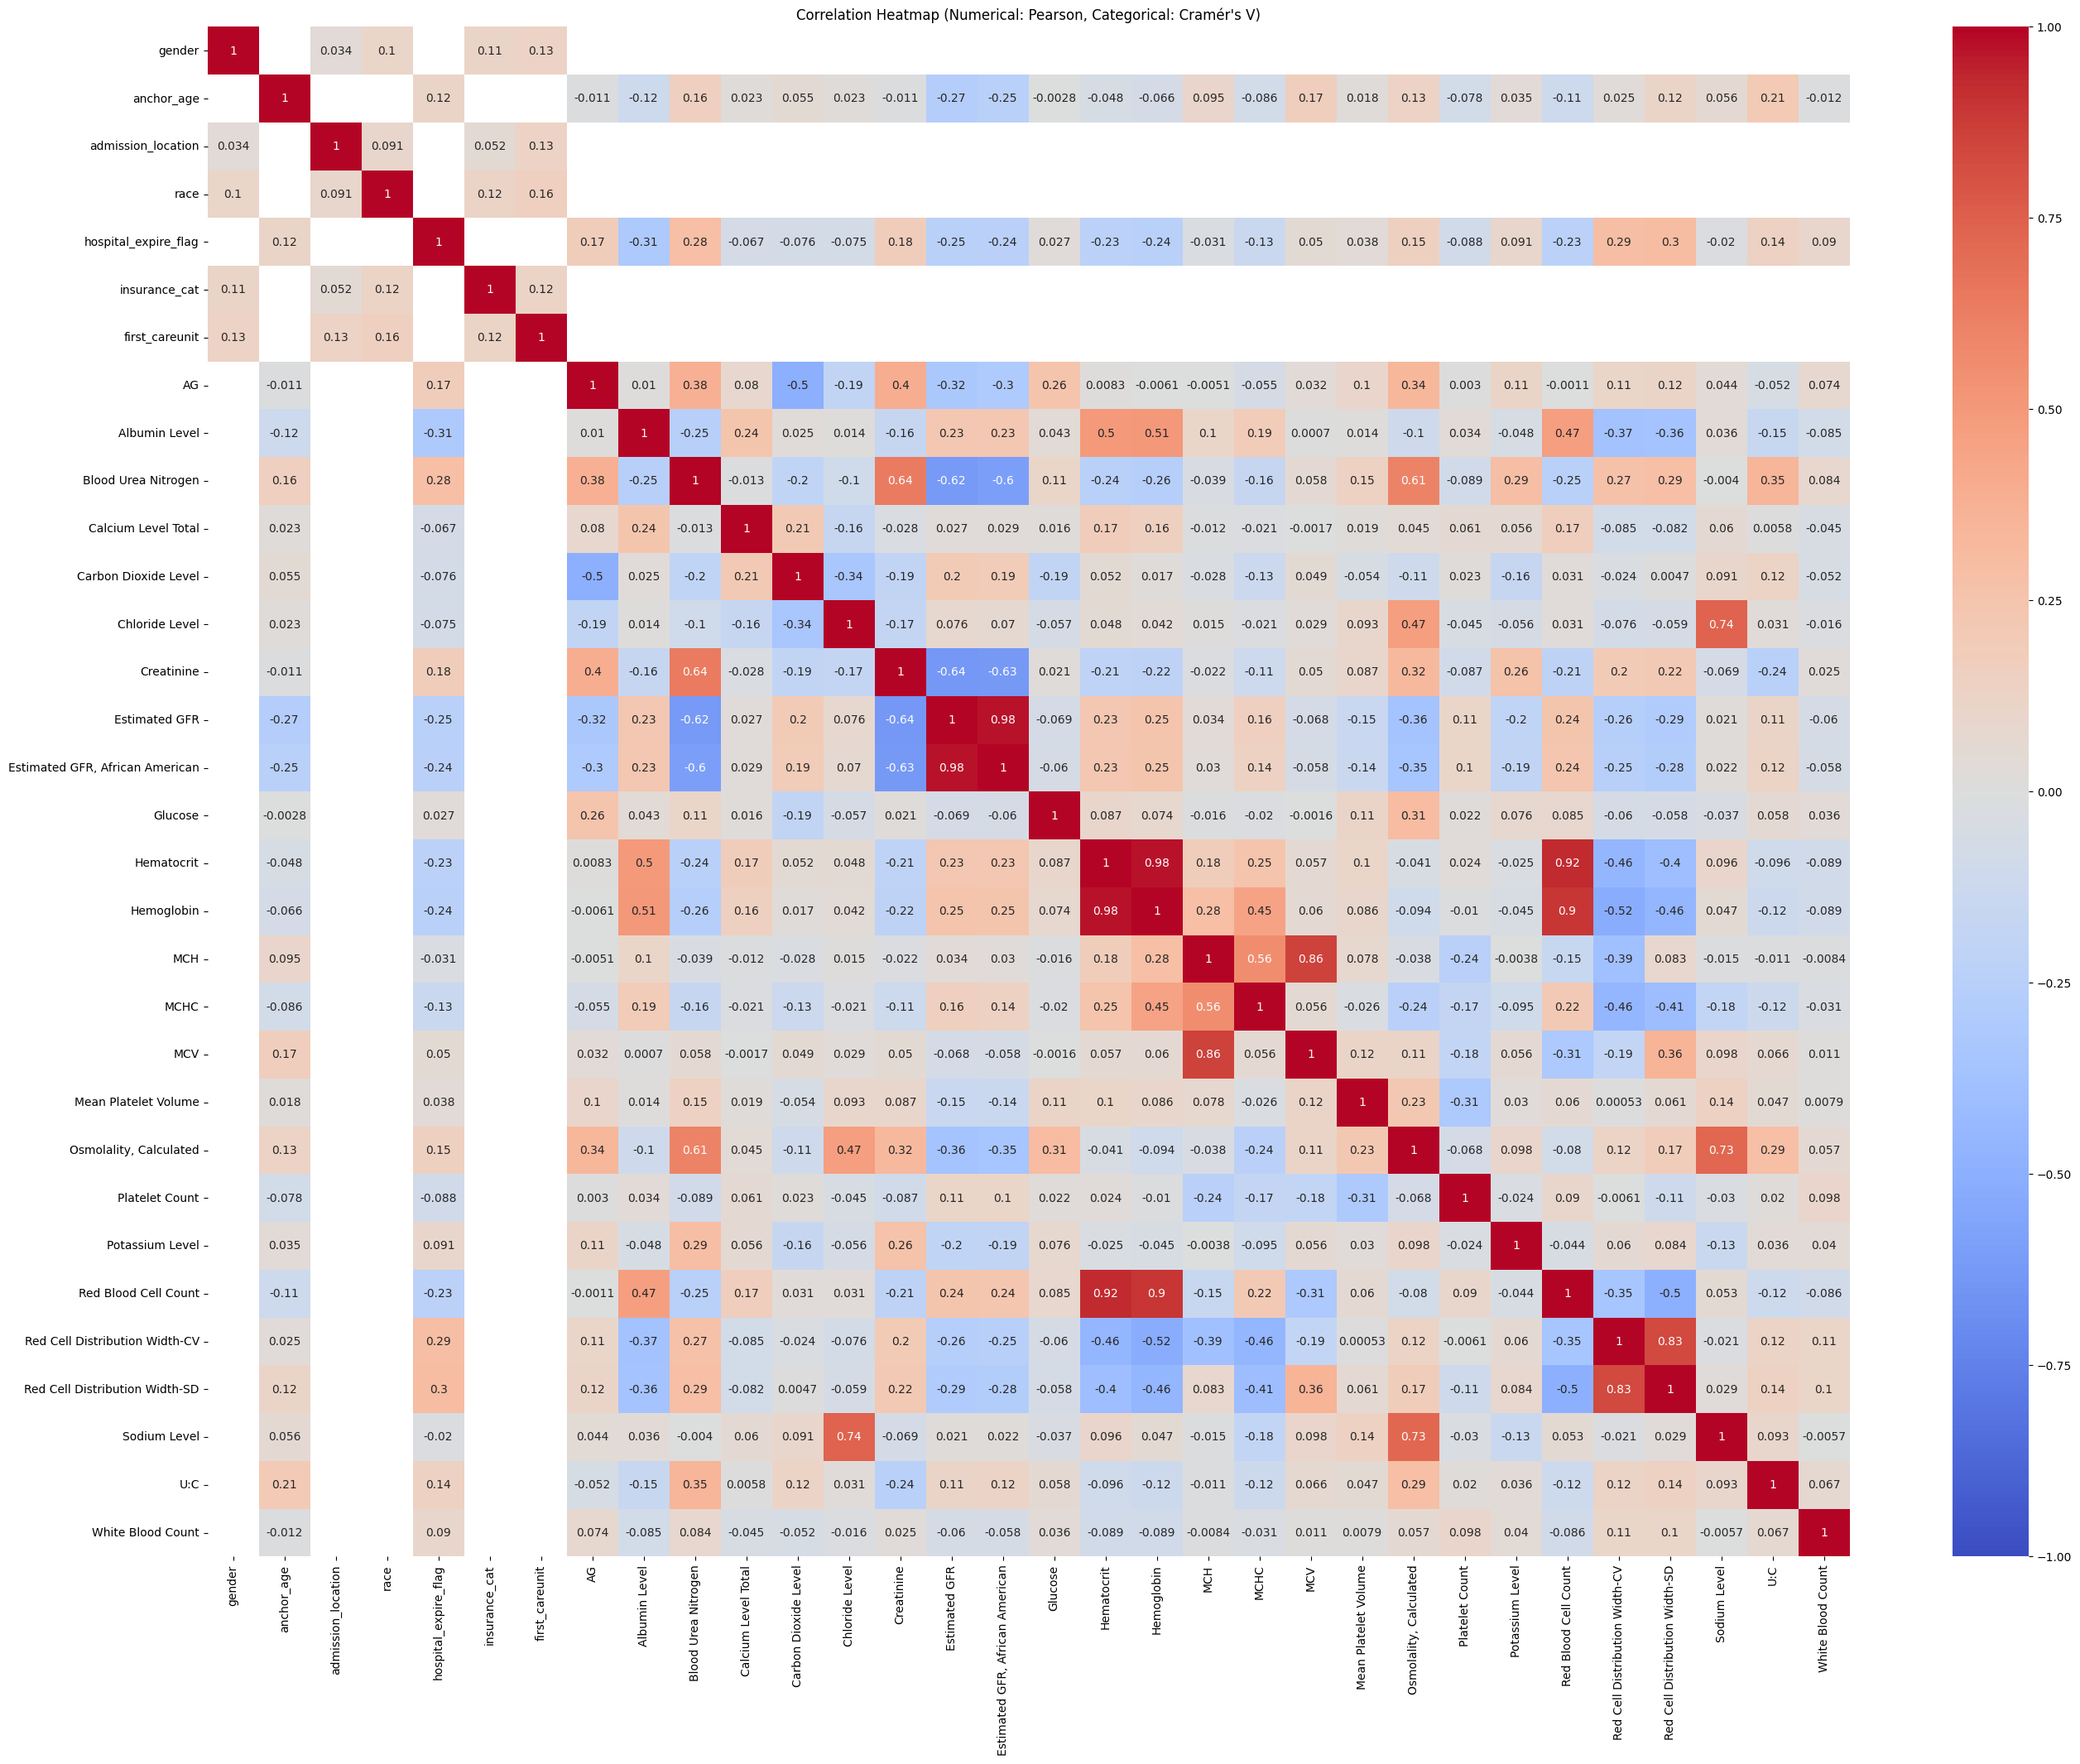

In [106]:
# Plot the heatmap
plt.figure(figsize=(32, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=correlation_matrix.isnull(), vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numerical: Pearson, Categorical: Cramér's V)")
plt.show()

#### First care unit and last care unit are highly correlated
#### Estimated GFR and Estimated GFR African American
#### Red Blood Cell and Hematocrit, same with Hemoglobin, thus removing Red Blood Cell Count
#### Sodium level with Chlroide level, same with Osmolality, Calculated
#### Hematocrit and Hemoglobin are also highly correlated
#### Red Cell Distribution Width-CV and RCD Width-SD

## Removing highly correlated features

In [108]:
df=df.drop(["Estimated GFR, African American", "Hematocrit", "Hemoglobin", "MCV", "Sodium Level", "Red Cell Distribution Width-SD"],axis=1)

In [109]:
df

gender  anchor_age admission_location race hospital_expire_flag  \
0          1          77                  2    0                    0   
1          0          75                  9    0                    0   
2          0          25                  9    5                    1   
3          0          71                  9    2                    0   
4          1          56                  2    2                    0   
...      ...         ...                ...  ...                  ...   
55904      1          74                  2    2                    0   
55905      0          73                  2    2                    0   
55906      1          65                  2    2                    0   
55907      0          79                  2    2                    0   
55908      0          58                  9    0                    0   

      insurance_cat first_careunit    AG  Albumin Level  Blood Urea Nitrogen  \
0                 3             12   5.0            3.9                  9.0   
1                 6              4  12.0            4.0                 15.0   
2                 1              6   6.0            3.2                 14.0   
3                 3             16   8.0            2.6                 34.0   
4                 5             19   5.0            4.1                 18.0   
...             ...            ...   ...            ...                  ...   
55904             5              5   7.0            3.8                 13.0   
55905             5             11   9.0            4.2                 16.0   
55906             3              0   8.0            4.3                 16.0   
55907             3             30   7.0            3.0                 28.0   
55908             3              5  10.0            2.4                 11.0   

       ...   MCH  MCHC  Mean Platelet Volume  Osmolality, Calculated  \
0      ...  29.8  33.3                  10.8                   272.0   
1      ...  30.3  32.2                  11.0                   280.0   
2      ...  31.9  32.3                  11.9                   313.0   
3      ...  29.6  32.0                  11.0                   285.0   
4      ...  28.0  32.9                   9.4                   280.0   
...    ...   ...   ...                   ...                     ...   
55904  ...  33.7  34.8                  10.5                   284.0   
55905  ...  27.4  32.6                  10.2                   266.0   
55906  ...  30.2  33.0                  10.1                   282.0   
55907  ...  32.5  32.6                  12.0                   267.0   
55908  ...  27.4  31.4                   9.3                   272.0   

       Platelet Count  Potassium Level  Red Blood Cell Count  \
0               307.0              4.3                  4.96   
1               273.0              3.8                  5.01   
2               217.0              3.1                  4.57   
3               196.0              4.7                  3.95   
4               192.0              4.3                  4.28   
...               ...              ...                   ...   
55904           250.0              3.8                  3.83   
55905           158.0              3.2                  5.19   
55906           127.0              3.8                  5.16   
55907           111.0              4.3                  3.57   
55908           991.0              4.3                  3.36   

       Red Cell Distribution Width-CV   U:C  White Blood Count  
0                                14.1  12.0               10.0  
1                                13.1  25.0                5.5  
2                                12.9  10.0               18.7  
3                                17.3  24.0                5.7  
4                                14.7  21.0                8.2  
...                               ...   ...                ...  
55904                            13.9  26.0               10.5  
55905         

In [110]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

categorical_cols=list(categorical_cols)
numerical_cols=list(numerical_cols)

In [111]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Initialize a correlation matrix
correlation_matrix = pd.DataFrame(np.zeros((len(df.columns), len(df.columns))), 
                                  index=df.columns, columns=df.columns)

# Populate correlation matrix
for col1 in df.columns:
    for col2 in df.columns:
        if col1 in numerical_cols and col2 in numerical_cols:
            correlation_matrix.loc[col1, col2] = df[[col1, col2]].corr().iloc[0, 1]
        elif col1 in categorical_cols and col2 in categorical_cols:
            correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        else:
            # Correlation between numerical and categorical variables
            correlation_matrix.loc[col1, col2] = np.nan  # You can apply other techniques if needed

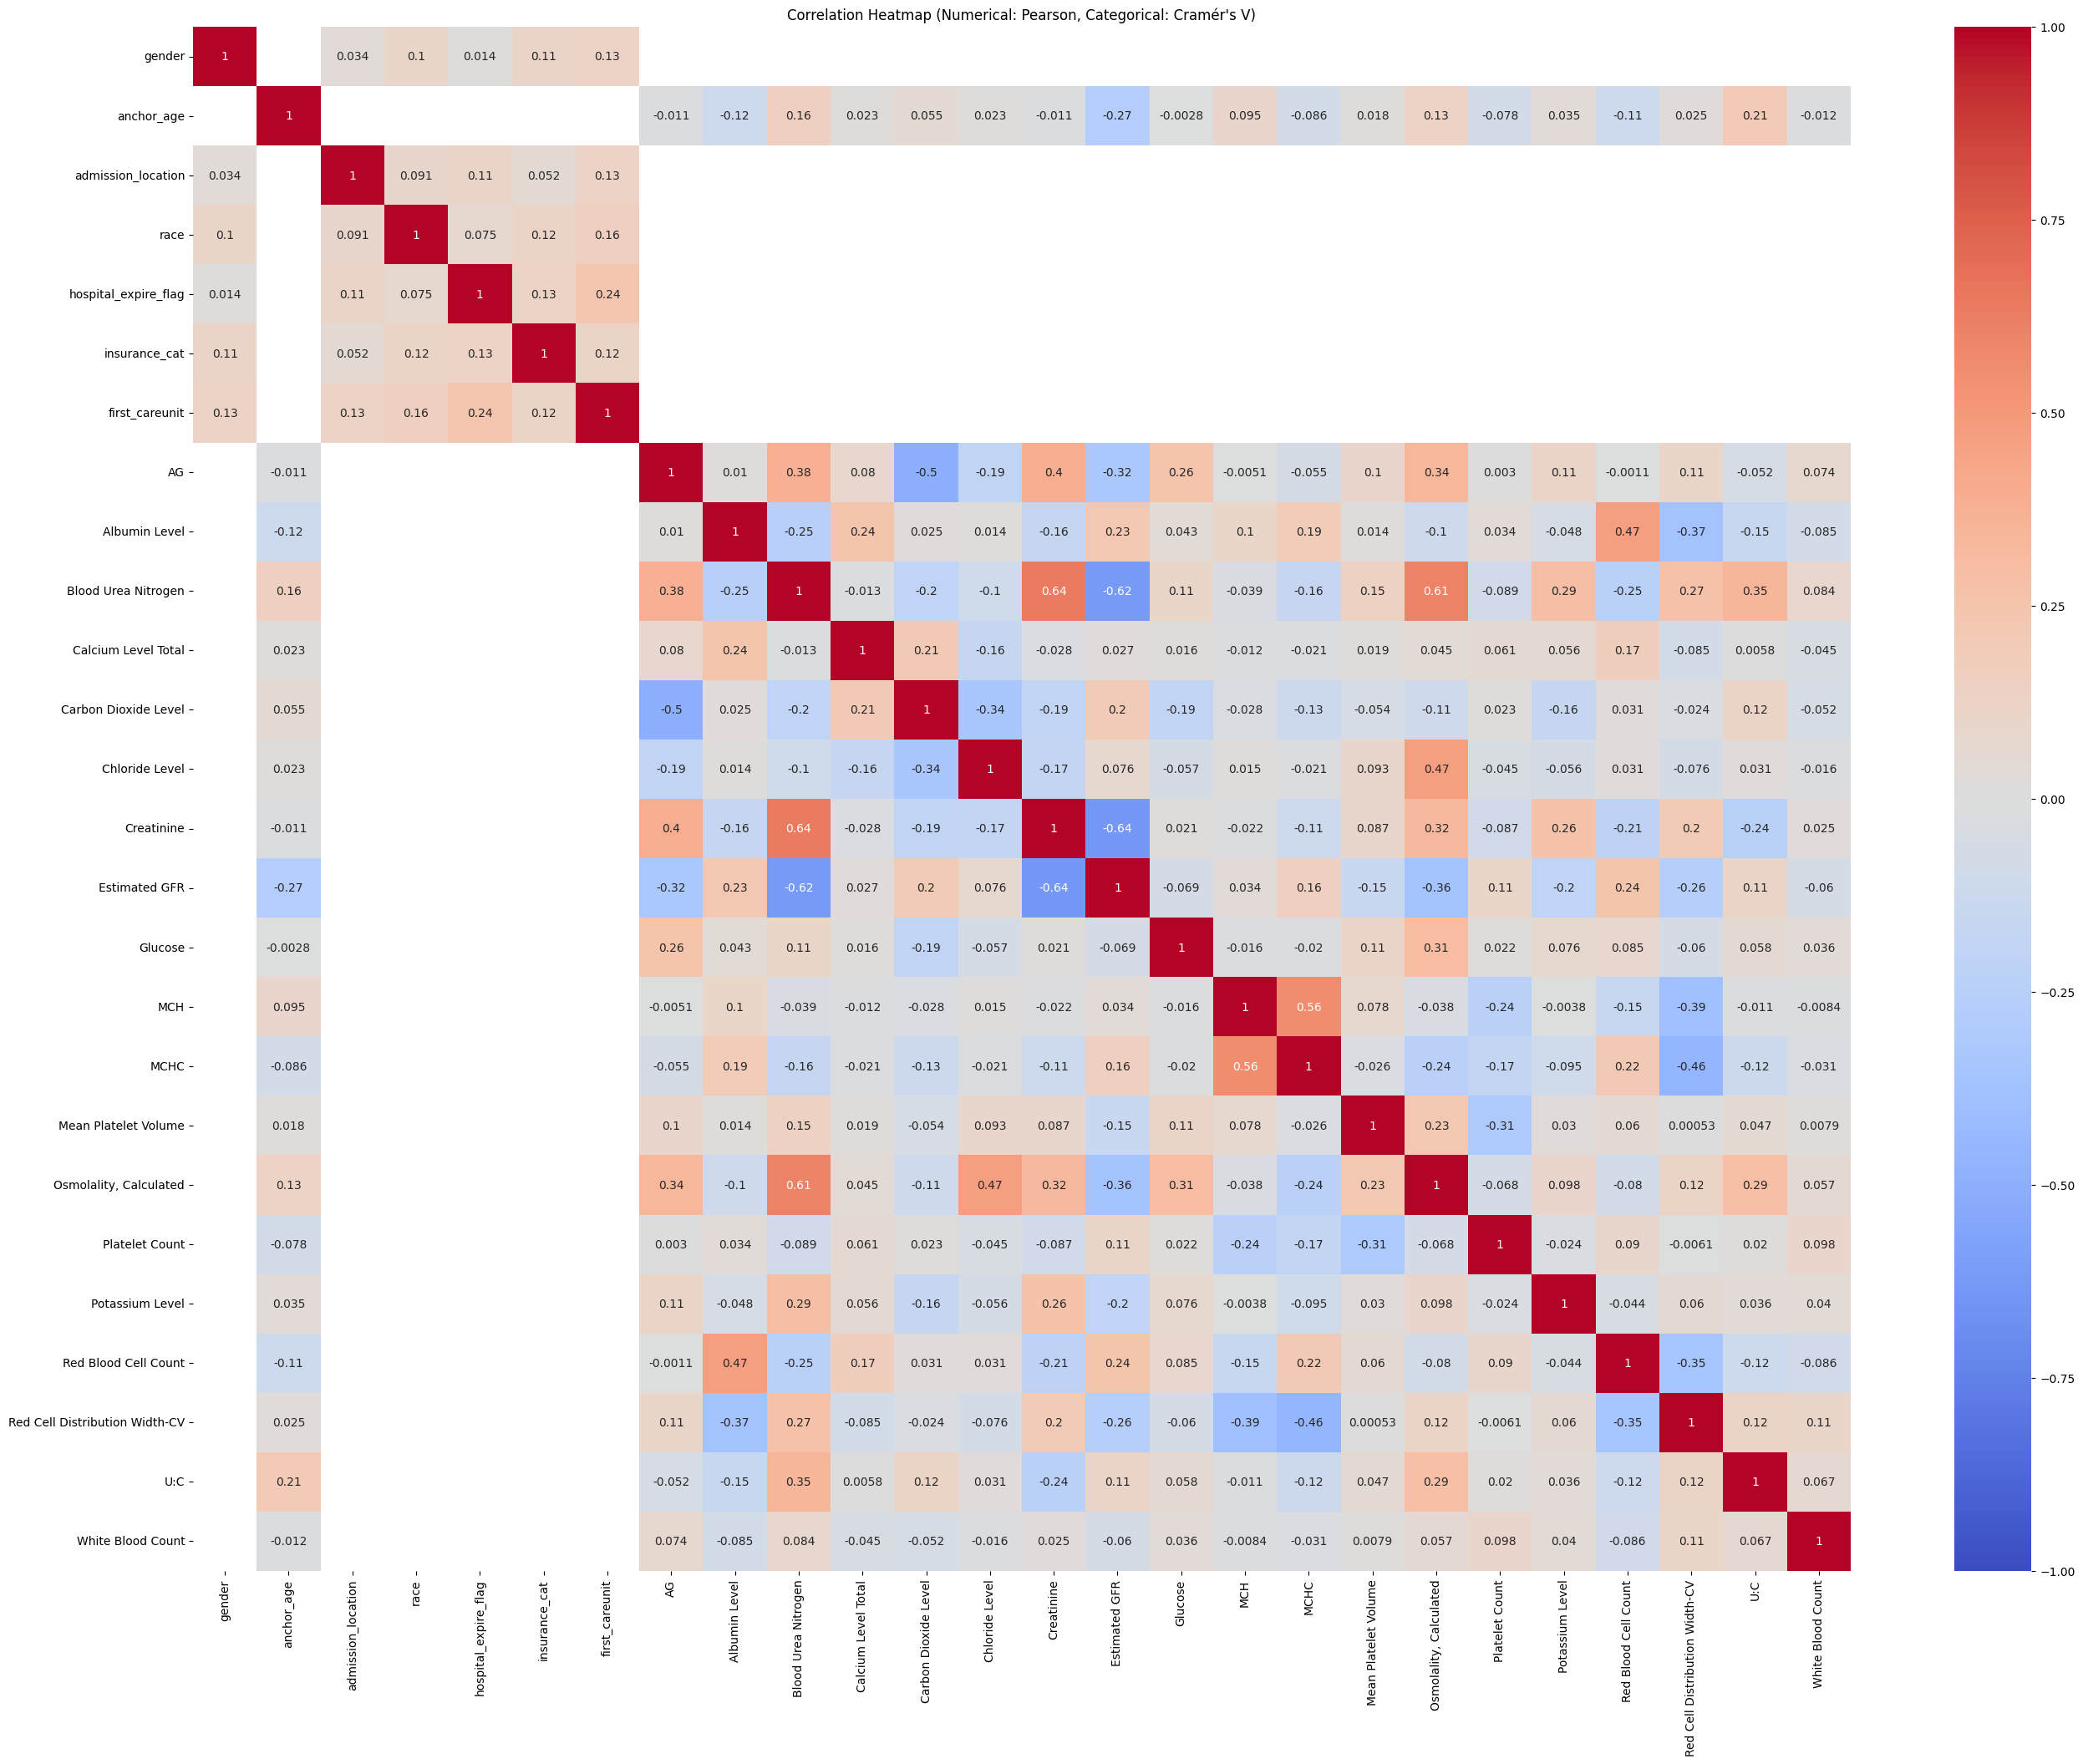

In [112]:
# Plot the heatmap
plt.figure(figsize=(32, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=correlation_matrix.isnull(), vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numerical: Pearson, Categorical: Cramér's V)")
plt.show()

In [113]:
df=df.drop_duplicates()
df

gender  anchor_age admission_location race hospital_expire_flag  \
0          1          77                  2    0                    0   
1          0          75                  9    0                    0   
2          0          25                  9    5                    1   
3          0          71                  9    2                    0   
4          1          56                  2    2                    0   
...      ...         ...                ...  ...                  ...   
55904      1          74                  2    2                    0   
55905      0          73                  2    2                    0   
55906      1          65                  2    2                    0   
55907      0          79                  2    2                    0   
55908      0          58                  9    0                    0   

      insurance_cat first_careunit    AG  Albumin Level  Blood Urea Nitrogen  \
0                 3             12   5.0            3.9                  9.0   
1                 6              4  12.0            4.0                 15.0   
2                 1              6   6.0            3.2                 14.0   
3                 3             16   8.0            2.6                 34.0   
4                 5             19   5.0            4.1                 18.0   
...             ...            ...   ...            ...                  ...   
55904             5              5   7.0            3.8                 13.0   
55905             5             11   9.0            4.2                 16.0   
55906             3              0   8.0            4.3                 16.0   
55907             3             30   7.0            3.0                 28.0   
55908             3              5  10.0            2.4                 11.0   

       ...   MCH  MCHC  Mean Platelet Volume  Osmolality, Calculated  \
0      ...  29.8  33.3                  10.8                   272.0   
1      ...  30.3  32.2                  11.0                   280.0   
2      ...  31.9  32.3                  11.9                   313.0   
3      ...  29.6  32.0                  11.0                   285.0   
4      ...  28.0  32.9                   9.4                   280.0   
...    ...   ...   ...                   ...                     ...   
55904  ...  33.7  34.8                  10.5                   284.0   
55905  ...  27.4  32.6                  10.2                   266.0   
55906  ...  30.2  33.0                  10.1                   282.0   
55907  ...  32.5  32.6                  12.0                   267.0   
55908  ...  27.4  31.4                   9.3                   272.0   

       Platelet Count  Potassium Level  Red Blood Cell Count  \
0               307.0              4.3                  4.96   
1               273.0              3.8                  5.01   
2               217.0              3.1                  4.57   
3               196.0              4.7                  3.95   
4               192.0              4.3                  4.28   
...               ...              ...                   ...   
55904           250.0              3.8                  3.83   
55905           158.0              3.2                  5.19   
55906           127.0              3.8                  5.16   
55907           111.0              4.3                  3.57   
55908           991.0              4.3                  3.36   

       Red Cell Distribution Width-CV   U:C  White Blood Count  
0                                14.1  12.0               10.0  
1                                13.1  25.0                5.5  
2                                12.9  10.0               18.7  
3                                17.3  24.0                5.7  
4                                14.7  21.0                8.2  
...                               ...   ...                ...  
55904                            13.9  26.0               10.5  
55905         

In [114]:
df=df.dropna(subset=['hospital_expire_flag'])

In [115]:
df["hospital_expire_flag"].value_counts()

hospital_expire_flag
0    42314
1    13595
Name: count, dtype: int64

In [116]:
df=df.reset_index()
df=df.drop(["index"],axis=1)
df

gender  anchor_age admission_location race hospital_expire_flag  \
0          1          77                  2    0                    0   
1          0          75                  9    0                    0   
2          0          25                  9    5                    1   
3          0          71                  9    2                    0   
4          1          56                  2    2                    0   
...      ...         ...                ...  ...                  ...   
55904      1          74                  2    2                    0   
55905      0          73                  2    2                    0   
55906      1          65                  2    2                    0   
55907      0          79                  2    2                    0   
55908      0          58                  9    0                    0   

      insurance_cat first_careunit    AG  Albumin Level  Blood Urea Nitrogen  \
0                 3             12   5.0            3.9                  9.0   
1                 6              4  12.0            4.0                 15.0   
2                 1              6   6.0            3.2                 14.0   
3                 3             16   8.0            2.6                 34.0   
4                 5             19   5.0            4.1                 18.0   
...             ...            ...   ...            ...                  ...   
55904             5              5   7.0            3.8                 13.0   
55905             5             11   9.0            4.2                 16.0   
55906             3              0   8.0            4.3                 16.0   
55907             3             30   7.0            3.0                 28.0   
55908             3              5  10.0            2.4                 11.0   

       ...   MCH  MCHC  Mean Platelet Volume  Osmolality, Calculated  \
0      ...  29.8  33.3                  10.8                   272.0   
1      ...  30.3  32.2                  11.0                   280.0   
2      ...  31.9  32.3                  11.9                   313.0   
3      ...  29.6  32.0                  11.0                   285.0   
4      ...  28.0  32.9                   9.4                   280.0   
...    ...   ...   ...                   ...                     ...   
55904  ...  33.7  34.8                  10.5                   284.0   
55905  ...  27.4  32.6                  10.2                   266.0   
55906  ...  30.2  33.0                  10.1                   282.0   
55907  ...  32.5  32.6                  12.0                   267.0   
55908  ...  27.4  31.4                   9.3                   272.0   

       Platelet Count  Potassium Level  Red Blood Cell Count  \
0               307.0              4.3                  4.96   
1               273.0              3.8                  5.01   
2               217.0              3.1                  4.57   
3               196.0              4.7                  3.95   
4               192.0              4.3                  4.28   
...               ...              ...                   ...   
55904           250.0              3.8                  3.83   
55905           158.0              3.2                  5.19   
55906           127.0              3.8                  5.16   
55907           111.0              4.3                  3.57   
55908           991.0              4.3                  3.36   

       Red Cell Distribution Width-CV   U:C  White Blood Count  
0                                14.1  12.0               10.0  
1                                13.1  25.0                5.5  
2                                12.9  10.0               18.7  
3                                17.3  24.0                5.7  
4                                14.7  21.0                8.2  
...                               ...   ...                ...  
55904                            13.9  26.0               10.5  
55905         

In [117]:
X = df.drop('hospital_expire_flag', axis=1)
y = df['hospital_expire_flag']

In [118]:
#Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [119]:
#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [161]:
#Build and Train  Model
# Create the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:40:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [162]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(np.array(y_pred), np.array(list(y_test)))
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7934


In [122]:
# Get feature importance scores
importance_scores = model.get_booster().get_score(importance_type='weight')

# Convert the scores to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_scores.values()
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df)

                           Feature  Importance
0                White Blood Count       283.0
1                          Glucose       270.0
2                   Platelet Count       267.0
3             Red Blood Cell Count       266.0
4   Red Cell Distribution Width-CV       241.0
5                              MCH       237.0
6             Mean Platelet Volume       233.0
7           Osmolality, Calculated       227.0
8                       anchor_age       218.0
9                       Creatinine       217.0
10                  first_careunit       215.0
11                            MCHC       213.0
12                   Albumin Level       212.0
13                   Estimated GFR       201.0
14             Blood Urea Nitrogen       191.0
15             Calcium Level Total       182.0
16                  Chloride Level       178.0
17                 Potassium Level       176.0
18            Carbon Dioxide Level       174.0
19                             U:C       168.0
20           

In [124]:
# X = df.drop(['hospital_expire_flag', ''], axis=1)
# y = df['hospital_expire_flag']

In [69]:
# #Scale the Data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [148]:
#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [149]:
#Build and Train  Model
# Create the XGBoost classifier
#model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# # Train the model
# model.fit(X_train, y_train)

In [152]:
y_train.dtypes

dtype('O')

In [153]:
y_train = pd.Categorical(y_train).codes

In [ ]:
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(np.array(y_pred), np.array(list(y_test)))
print(f"Accuracy: {accuracy:.4f}")


# Generate and print the classification report
report = classification_report(np.array(y_pred), np.array(list(y_test)))
print(report)

In [172]:

# Generate and print the classification report
report = classification_report(np.array(y_pred), np.array(list(y_test)))
print(report)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     13912
           1       0.43      0.62      0.51      2861

    accuracy                           0.79     16773
   macro avg       0.67      0.72      0.69     16773
weighted avg       0.83      0.79      0.81     16773



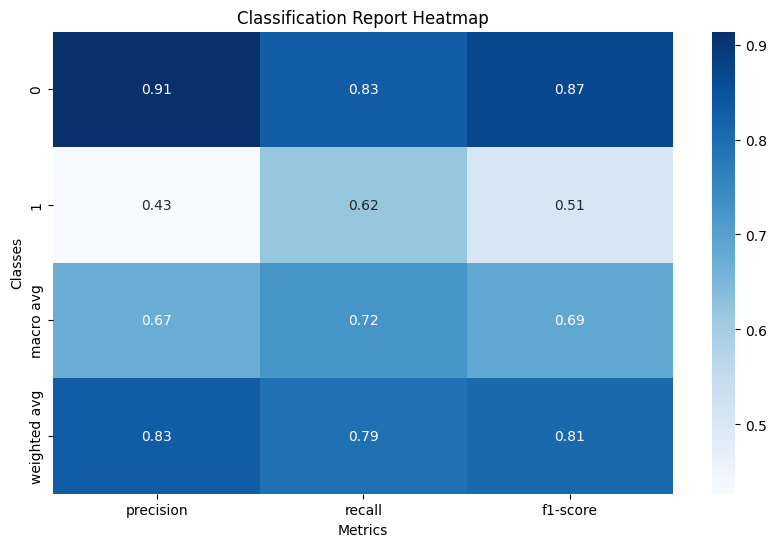

In [171]:
# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Remove any columns that are not needed (e.g., 'accuracy' row)
report_df = report_df.drop(["accuracy"], errors="ignore")

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='Blues')

# Set title and labels
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')

# Show the plot
plt.show()

In [129]:
param_grid = {
    'learning_rate': [0.005, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [130]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [131]:
grid_search.fit(X_train, y_train)

/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/home/j

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.005, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [132]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}


In [133]:
#print("Best Parameters:", grid_search.best_params_)
#print("Best Score:", grid_search.best_score_)

In [134]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:25:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.005, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [135]:
y_pred=best_model.predict(X_test)

In [136]:
# Calculate accuracy
accuracy = accuracy_score(np.array(y_pred), np.array(list(y_test)))
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7530


In [137]:
# Generate and print the classification report
report = classification_report(np.array(y_pred), np.array(list(y_test)))
print(report)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     16773
           1       0.00      0.00      0.00         0

    accuracy                           0.75     16773
   macro avg       0.50      0.38      0.43     16773
weighted avg       1.00      0.75      0.86     16773



/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END colsample_bytree=0.6, learning_rate=0.005, max_depth=3, n_estimators=200, subsample=0.6; total time=   5.4s
[CV] END colsample_bytree=0.6, learning_rate=0.005, max_depth=5, n_estimators=300, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.6, learning_rate=0.005, max_depth=7, n_estimators=300, subsample=1.0; total time=   7.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimator